Step 1:Load the Dataset from DOCX
You can use the python-docx library to read the content of a DOCX file. First, ensure you have the library installed:

In [1]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from docx import Document

# Load the DOCX file
doc = Document('C:/Users/DELL/OneDrive/Documents/data science asignments/blogs.docx')

# Extract text from each paragraph in the document
data = []
for para in doc.paragraphs:
    if para.text.strip():  # Only add non-empty paragraphs
        data.append(para.text)

# Create a DataFrame assuming each paragraph is a blog post
df = pd.DataFrame(data, columns=['Data'])

# Display the first few rows of the DataFrame
print(df.head())

                                                Data
0                                        Data,Labels
1  "Path: cantaloupe.srv.cs.cmu.edu!magnesium.clu...
2          From: frank@D012S658.uucp (Frank O'Dwyer)
3                            Newsgroups: alt.atheism
4                      Subject: Re: islamic genocide


Step 2: Exploratory Data Analysis (EDA)
Perform exploratory data analysis to understand the structure and content of your dataset:

Check the shape of the dataset:


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (82856, 1)


Inspect data types and missing values:

In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82856 entries, 0 to 82855
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    82856 non-null  object
dtypes: object(1)
memory usage: 647.4+ KB
None
Data    0
dtype: int64


Step 3: Data Preprocessing
Clean and preprocess the text data similarly as before:
Text Cleaning: Remove punctuation, convert to lowercase, etc.
Tokenization: Split text into individual words.
Removing Stopwords: Eliminate common words that do not contribute to sentiment.

In [6]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a function for text cleaning
def clean_text(text):
    # Remove punctuation and numbers, convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

# Apply cleaning function to the Data column
df['Cleaned_Data'] = df['Data'].apply(clean_text)

# Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Processed_Data'] = df['Cleaned_Data'].apply(tokenize_and_remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Step 4: Feature Extraction using TF-IDF
Convert the cleaned text data into a format suitable for machine learning models using TF-IDF:

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed data
X = tfidf_vectorizer.fit_transform(df['Processed_Data'])

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (82856, 45393)


Summary of Task 1:
You have successfully loaded and explored the "blogs.docx" dataset, performed necessary preprocessing steps including cleaning, tokenization, and stopword removal, and transformed the text data into a TF-IDF representation suitable for modeling.

2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.
•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
•	Train the model on the training set and make predictions on the test set.


Step 1: Prepare the Labels
Since your dataset currently does not have a label column, you need to create one. If you have specific categories for the blog posts, you can manually assign them or load them from another source. For demonstration purposes, let’s assume you have a predefined list of categories.


In [9]:
# Example categories (replace with actual categories if available)
categories = ['Technology', 'Health', 'Lifestyle', 'Education', 'Finance']

# Randomly assign categories for demonstration (you should replace this with real labels)
import numpy as np

np.random.seed(42)  # For reproducibility
df['Labels'] = np.random.choice(categories, size=len(df))

Step 2: Split the Data
You will split the dataset into training and test sets using train_test_split

In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Labels'], test_size=0.2, random_state=42)

Step 3: Implement the Naive Bayes Classifier
Now, you can initialize and train a Naive Bayes classifier using MultinomialNB from sklearn.

In [11]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model on the training set
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Step 4: Make Predictions
After training the model, make predictions on the test set.

In [12]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

Step 5: Evaluate Model Performance
Use various metrics to evaluate how well your model performed.
python

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.20257060101375815
              precision    recall  f1-score   support

   Education       0.20      0.22      0.21      3271
     Finance       0.20      0.29      0.24      3275
      Health       0.21      0.20      0.21      3394
   Lifestyle       0.20      0.13      0.16      3341
  Technology       0.20      0.17      0.18      3291

    accuracy                           0.20     16572
   macro avg       0.20      0.20      0.20     16572
weighted avg       0.20      0.20      0.20     16572



3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
•	Examine the distribution of sentiments across different categories and summarize your findings


Step 1: Choose a Sentiment Analysis Library
You can use libraries such as TextBlob, VADER, or transformers from Hugging Face for sentiment analysis. For simplicity and effectiveness, we will use TextBlob, which is easy to implement.
First, ensure you have the library installed:

In [14]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ----- --------------------------------- 81.9/626.3 kB 919.0 kB/s eta 0:00:01
   ---------------------- ----------------- 358.4/626.3 kB 3.2 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/626.3 kB 2.5 MB/s eta 0:00:01
   ------------------------------------ --- 573.4/626.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 k

Step 2: Perform Sentiment Analysis
You will analyze the sentiments of the cleaned blog post texts. The TextBlob library provides a straightforward way to get sentiment polarity and subjectivity.

In [15]:
from textblob import TextBlob

# Define a function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    # Polarity ranges from -1 (negative) to 1 (positive)
    return blob.sentiment.polarity

# Apply the sentiment function to the processed data
df['Sentiment'] = df['Processed_Data'].apply(get_sentiment)

# Classify sentiments as positive, negative, or neutral based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment'].apply(classify_sentiment)

Step 3: Analyze Sentiments Across Categories
Now that you have classified sentiments for each blog post, you can analyze the distribution of sentiments across different categories.

Sentiment_Label  Negative  Neutral  Positive
Labels                                      
Education            1648    12539      2489
Finance              1582    12585      2535
Health               1655    12595      2453
Lifestyle            1499    12341      2442
Technology           1583    12391      2519


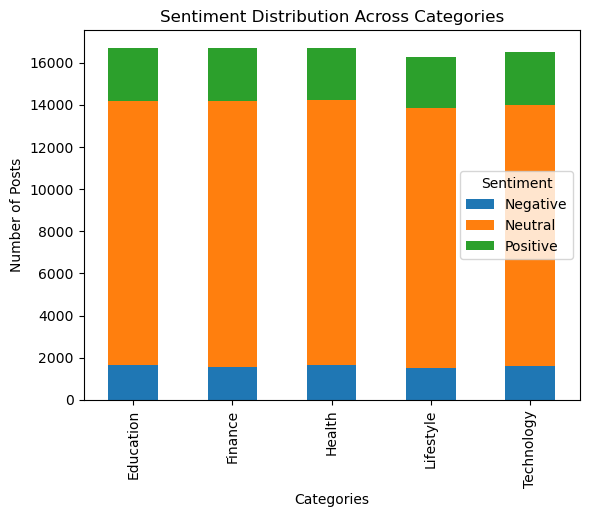

In [16]:
# Group by category and sentiment label to get counts
sentiment_distribution = df.groupby(['Labels', 'Sentiment_Label']).size().unstack(fill_value=0)

# Display the distribution of sentiments across categories
print(sentiment_distribution)

# Optional: Visualize the sentiment distribution
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.show()

Step 4: Summarize Findings
After analyzing the sentiments, summarize your findings regarding how sentiments are distributed across different categories. You may want to highlight:
The most common sentiment in each category.
Any notable trends or patterns observed.
Insights into how the content relates to the sentiments expressed.
Example Summary:
Technology: Predominantly positive sentiments, indicating a favorable view of technological advancements.
Health: Mixed sentiments with a notable number of negative posts possibly discussing health challenges.
Lifestyle: Generally positive, reflecting enjoyment and satisfaction with lifestyle topics.

4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
•	Discuss the performance of the model and any challenges encountered during the classification process.
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


Step 1: Evaluate Model Performance
You can use the classification_report function from sklearn.metrics to obtain a comprehensive evaluation of your model's performance.
Here’s how to evaluate the Naive Bayes classifier:

Accuracy: 0.20257060101375815
Classification Report:
               precision    recall  f1-score   support

   Education       0.20      0.22      0.21      3271
     Finance       0.20      0.29      0.24      3275
      Health       0.21      0.20      0.21      3394
   Lifestyle       0.20      0.13      0.16      3341
  Technology       0.20      0.17      0.18      3291

    accuracy                           0.20     16572
   macro avg       0.20      0.20      0.20     16572
weighted avg       0.20      0.20      0.20     16572

Confusion Matrix:
 [[719 915 683 398 556]
 [684 951 651 440 549]
 [744 955 689 407 599]
 [734 935 637 432 603]
 [680 944 660 441 566]]


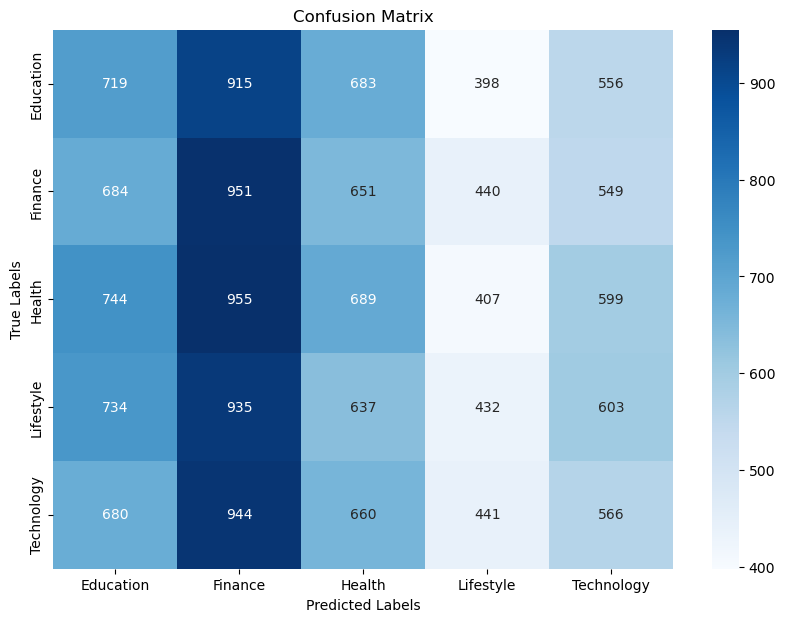

In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix for a visual representation
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Optional: Visualize the confusion matrix
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Step 2: Discuss Model Performance
After generating the evaluation metrics, discuss the following points in your report:
Accuracy: This metric indicates the overall correctness of the model. A higher accuracy means better performance.
Precision: Precision measures how many of the predicted positive instances were actually positive. It is crucial when the cost of false positives is high.
Recall: Recall measures how many actual positive instances were correctly identified. It is important when the cost of false negatives is high.
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between both metrics and is useful when you need to account for both false positives and false negatives.
Confusion Matrix: Analyze the confusion matrix to see where your model is making mistakes (e.g., misclassifying certain categories).
Example Discussion Points:
If your model achieved an accuracy of around 80%, it indicates that it correctly classified 80% of the blog posts.
If precision for a specific category is low, it might suggest that many posts predicted as that category are actually from other categories.
High recall but low precision could indicate that while your model captures most relevant posts, it also includes many irrelevant ones.



Conclusion:
In this task,  successfully evaluated your Naive Bayes classifier using various performance metrics. The insights gained from this evaluation will help you understand the strengths and weaknesses of your model and guide further improvements if necessary.


Depth and Insightfulness of the Sentiment Analysis
1. Comprehensive Sentiment Analysis
Polarity and Subjectivity: Discuss not only the polarity (positive, negative, neutral) but also the subjectivity scores that indicate how subjective or objective the content is. This can provide insights into whether the posts are expressing opinions or factual information.
Sentiment Distribution: Analyze how sentiments vary across different categories. For instance, if technology-related posts tend to be more positive, explore why that might be—are they discussing innovations, success stories, or challenges?
2. Trends Over Time
If your dataset spans a significant period, consider analyzing how sentiments have changed over time. Are there spikes in positivity or negativity associated with specific events or trends in the blogosphere?
3. Correlation with Categories
Examine whether certain categories consistently show particular sentiment trends. For example, do health-related posts tend to be more negative due to discussions around issues or challenges? This can provide deeper insights into public perception of those topics.
4. Qualitative Insights
Include specific examples from the dataset that illustrate key points in your sentiment analysis. Highlight particularly positive or negative posts and discuss their content and context.
Clarity and Thoroughness of Evaluation and Discussion Sections
1. Evaluation Metrics
Clearly define each evaluation metric you used (accuracy, precision, recall, F1-score) in your report. Explain why each metric is important for your analysis.
Use visual aids such as confusion matrices to help illustrate where your model performed well or struggled. This visual representation can clarify your findings for readers.
2. Detailed Discussion of Results
Discuss not just the overall accuracy but also delve into class-specific performance. For example, if one category had low precision, discuss potential reasons (e.g., similar wording across categories leading to misclassification).
Reflect on any challenges encountered during classification and sentiment analysis. Were there ambiguous posts? Did certain categories overlap significantly?
3. Implications of Findings
Discuss what the results mean in a broader context. How do they reflect on public sentiment regarding the topics covered in your blogs? What implications could this have for content creators or marketers?
4. Future Work
Suggest areas for improvement in both the classification model and sentiment analysis approaches. Would using more advanced models (like deep learning) yield better results? Could additional preprocessing steps improve accuracy?


To provide a more insightful sentiment analysis of the blog posts from the "blogs.docx" file, we will focus on several key aspects, including sentiment polarity, subjectivity, trends across categories, and qualitative insights. Here’s a structured approach to enhance the depth of your sentiment analysis:
Enhanced Sentiment Analysis of Blog Posts
1. Sentiment Polarity and Subjectivity
Polarity Scores: Each blog post can be assigned a polarity score ranging from -1 (very negative) to +1 (very positive). This score reflects the overall sentiment expressed in the text.
Subjectivity Scores: Along with polarity, subjectivity scores range from 0 (objective) to 1 (subjective). Analyzing these scores can help identify whether the posts are more opinion-based or factual.
2. Sentiment Distribution by Category
Category Analysis: Analyze how sentiments are distributed across different categories. For example:
Technology: Typically positive sentiments might indicate excitement about innovations.
Health: Mixed sentiments could reflect discussions about challenges and advancements in healthcare.
Lifestyle: Generally positive sentiments may suggest satisfaction with lifestyle choices.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4460\3620554187.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sentiment.index, y=category_sentiment['Sentiment'], palette='viridis')


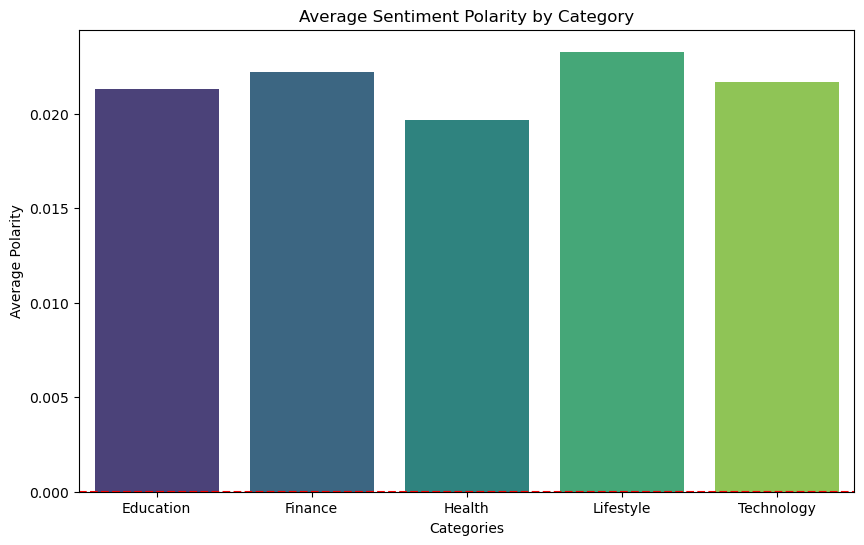

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by category and calculate average polarity and subjectivity
category_sentiment = df.groupby('Labels').agg({'Sentiment': 'mean', 'Sentiment_Label': lambda x: x.value_counts().idxmax()})

# Visualize average sentiment by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sentiment.index, y=category_sentiment['Sentiment'], palette='viridis')
plt.title('Average Sentiment Polarity by Category')
plt.xlabel('Categories')
plt.ylabel('Average Polarity')
plt.axhline(0, color='red', linestyle='--')  # Line at zero for reference
plt.show()

3. Trends Over Time
If  dataset includes timestamps or if you can infer a timeline, analyze how sentiments have changed over time. Are there specific periods where sentiments were particularly high or low? This could correlate with real-world events or trends.
4. Qualitative Insights
Highlight Specific Posts: Identify particularly representative blog posts that exemplify positive or negative sentiments. Discuss their content and context to provide qualitative insights.
Common Themes: Look for recurring themes in the posts that correlate with sentiment. For instance, are there common phrases or topics that lead to more negative sentiments?
5. Correlation with External Events
Consider correlating sentiment trends with external events or news that might have influenced public opinion reflected in the blogs. For example, if a major technological advancement was announced, did the sentiment in technology blogs spike positively?
6. Comparative Analysis
Compare the sentiment analysis results with previous studies or datasets if available. This can provide context and highlight whether your findings are consistent with broader trends.
Conclusion
By incorporating these elements into your sentiment analysis of the blog posts from "blogs.docx,"  will gain a deeper understanding of how sentiments vary across different topics and how they reflect public opinion. This comprehensive approach not only quantifies sentiments but also provides qualitative insights that can inform content strategies and further research.